#  CS105 Final Project Report - Airbnb
## Contributions
Shaurya Pathak - Supervised Learning XG Boost Model

Kavin Phabiani - EDA

Rishika Mundada - Supervised Learning XG Boost Model

Jonathan Trujillo - Unsupervised K-Means Clustering

Sean Quiambao - Unsupervised, Term Frequency Vectorization

# Web Scraping Information

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import heapq
import re

nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

# df = pd.read_csv("listings.csv")

df = pd.read_csv("/content/listings.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,City of Los Angeles,Beverlywood,34.048410,-118.387510,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
1,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,Other Cities,Beverly Hills,34.070583,-118.390742,Entire home/apt,434.0,30,0,NaN,NaN,4,267,0,NaN
2,1211025880050828732,Modern Hollywood Hills house,68445028,John,Other Cities,Beverly Hills,34.065140,-118.375820,Entire home/apt,319.0,1,0,NaN,NaN,25,365,0,NaN
3,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,Other Cities,Santa Monica,34.015590,-118.494080,Entire home/apt,231.0,5,44,2024-07-21,3.41,3,193,38,Exempt
4,5694422,2 Bedroom Modern Oasis,4151836,Sara,City of Los Angeles,Del Rey,33.990170,-118.422520,Entire home/apt,110.0,30,368,2023-05-04,3.21,2,117,0,HSR19-004352


<ipython-input-3-e0a4f70f9b45>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price', palette='coolwarm')


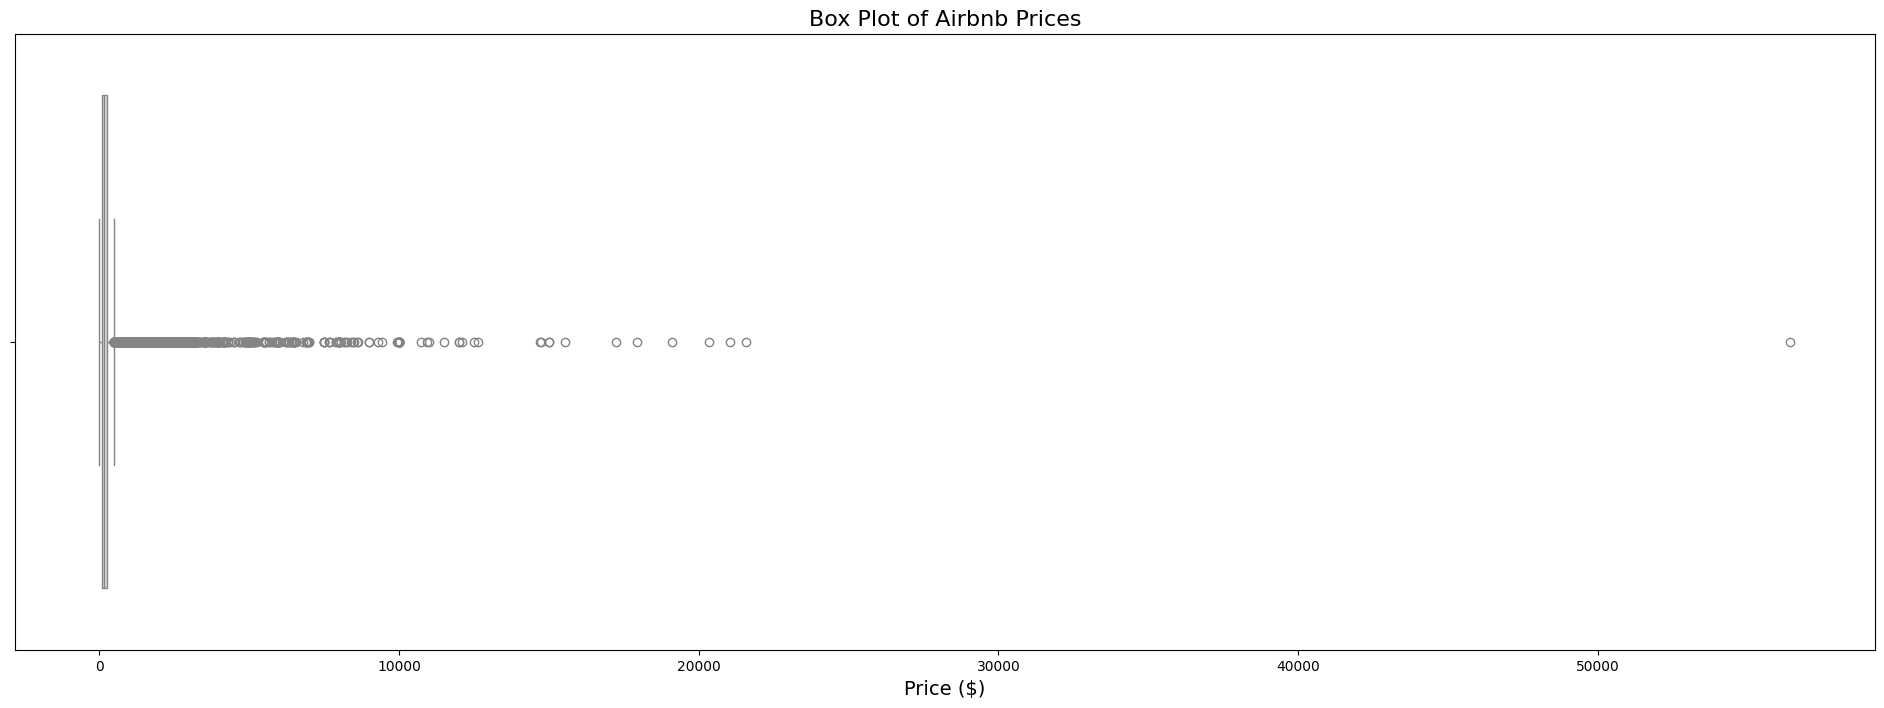

In [ ]:
# box plot for Airbnb prices
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24, 8)) # mamba
sns.boxplot(data=df, x='price', palette='coolwarm')

plt.title('Box Plot of Airbnb Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)

plt.show()


<ipython-input-27-91b868a283ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_capped', palette='coolwarm')


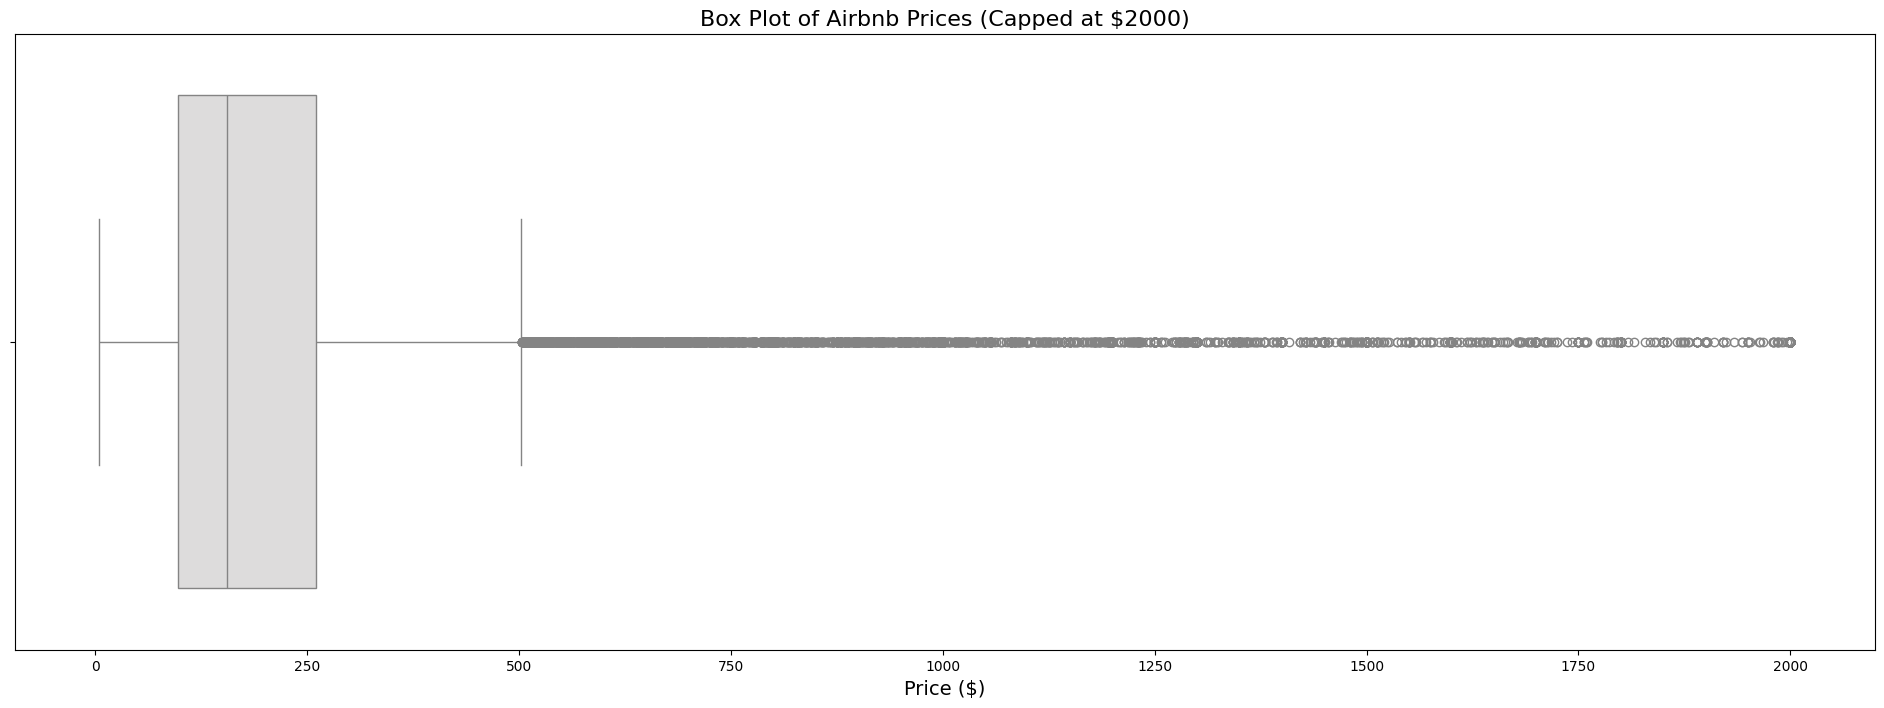

In [ ]:
df['price_capped'] = df['price'].clip(upper=2000)

plt.figure(figsize=(24, 8))
sns.boxplot(data=df, x='price_capped', palette='coolwarm')

plt.title('Box Plot of Airbnb Prices (Capped at $2000)', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)

plt.show()


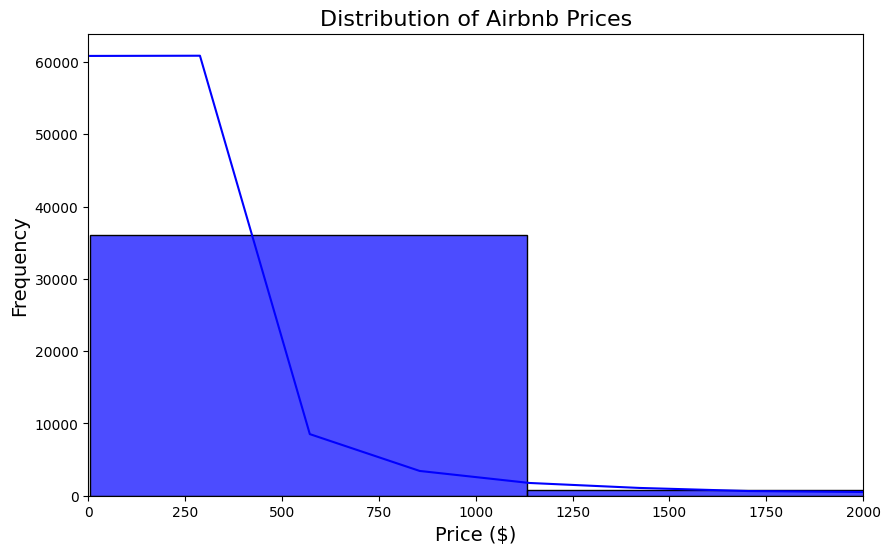

In [ ]:
#plot price dist
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue', alpha=0.7)


plt.title('Distribution of Airbnb Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

#exclude extreme outliers
plt.xlim(0, 2000)

#show
plt.show()


<ipython-input-5-ec4cb5227e47>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.5, palette='viridis')


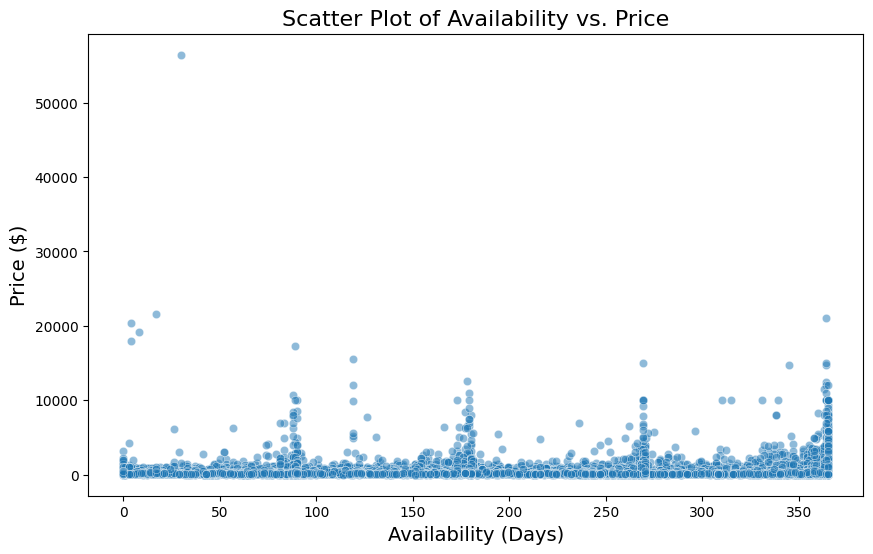

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.5, palette='viridis')

plt.title('Scatter Plot of Availability vs. Price', fontsize=16)
plt.xlabel('Availability (Days)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.show()


<ipython-input-6-c96930d41121>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_analysis, x='avg_price', y='word', palette='coolwarm')


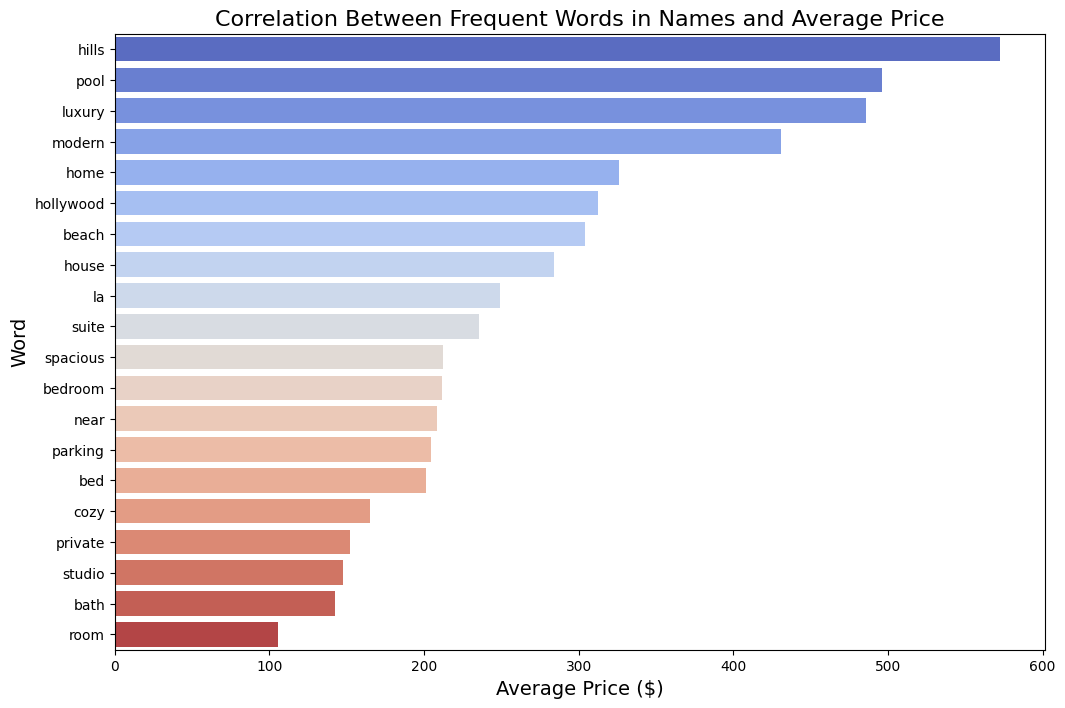

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text_data = df[['name', 'price']].dropna()

vectorizer = CountVectorizer(stop_words='english', max_features=20)  #extract top 20 words
X = vectorizer.fit_transform(text_data['name'])

word_features = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)

word_analysis = pd.DataFrame({
    'word': word_features,
    'frequency': word_counts,
    'avg_price': [np.mean(text_data['price'][X[:, i].toarray().ravel() > 0]) for i in range(len(word_features))]
}).sort_values(by='avg_price', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=word_analysis, x='avg_price', y='word', palette='coolwarm')

plt.title('Correlation Between Frequent Words in Names and Average Price', fontsize=16)
plt.xlabel('Average Price ($)', fontsize=14)
plt.ylabel('Word', fontsize=14)

plt.show()


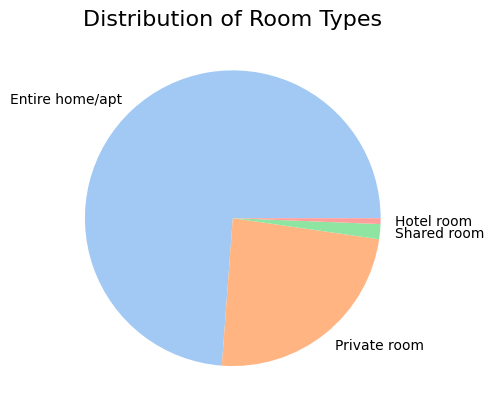

In [ ]:
room_type_counts = df['room_type'].value_counts()
plt.pie(room_type_counts, labels=room_type_counts.index, colors=sns.color_palette('pastel'))


plt.title('Distribution of Room Types', fontsize=16)
plt.show()


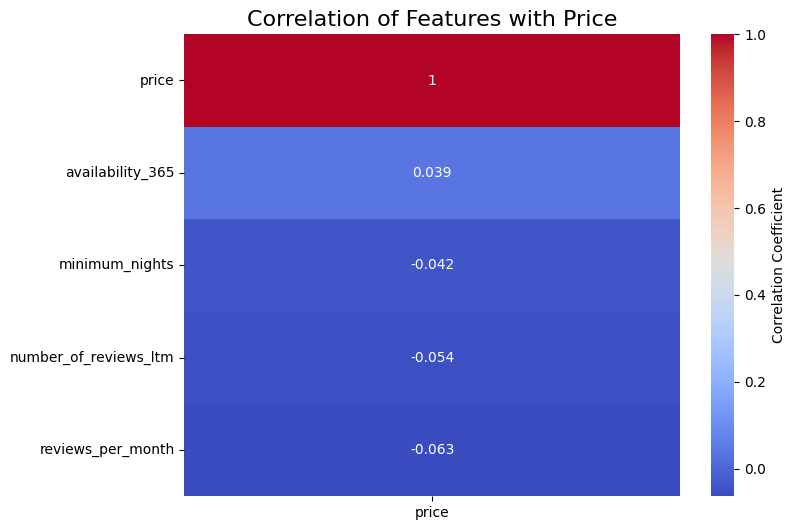

In [ ]:
relevant_data = df[['price', 'reviews_per_month', 'minimum_nights', 'number_of_reviews_ltm', 'availability_365']].dropna()

correlation_matrix = relevant_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix[['price']].sort_values(by='price', ascending=False),
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation of Features with Price', fontsize=16)
plt.show()


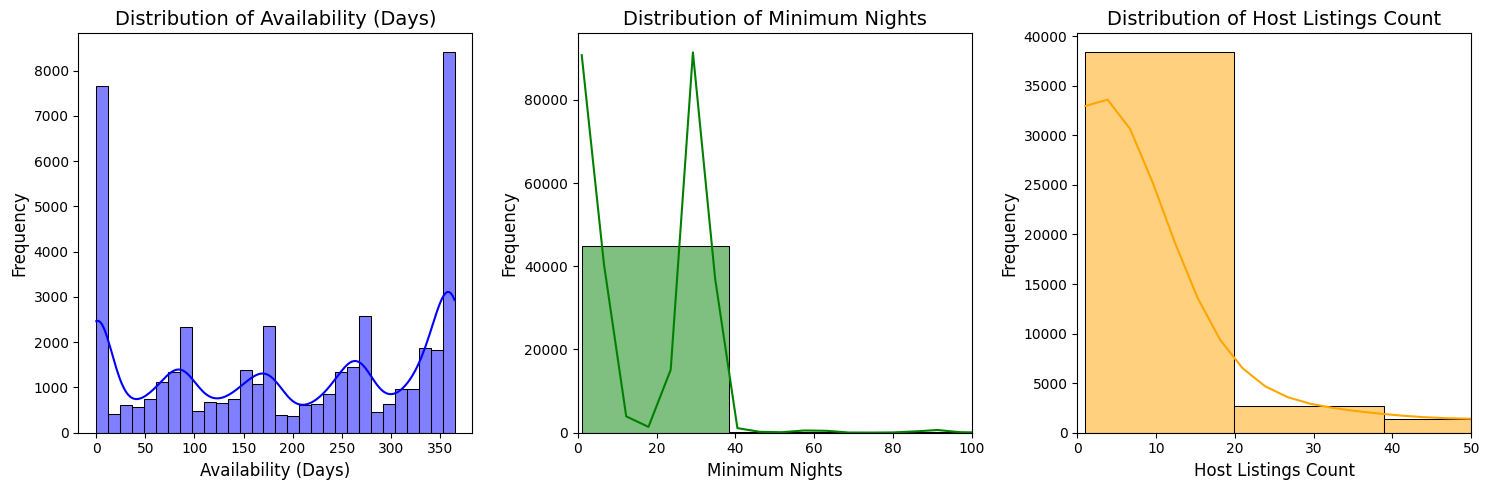

In [ ]:
distribution_data = df[['availability_365', 'minimum_nights', 'calculated_host_listings_count']]

plt.figure(figsize=(15, 5))

#availability
plt.subplot(1, 3, 1)
sns.histplot(distribution_data['availability_365'], kde=True, bins=30, color='blue')
plt.title('Distribution of Availability (Days)', fontsize=14)
plt.xlabel('Availability (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

#min nights
plt.subplot(1, 3, 2)
sns.histplot(distribution_data['minimum_nights'], kde=True, bins=30, color='green')
plt.title('Distribution of Minimum Nights', fontsize=14)
plt.xlabel('Minimum Nights', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 100)

#host listings count
plt.subplot(1, 3, 3)
sns.histplot(distribution_data['calculated_host_listings_count'], kde=True, bins=30, color='orange')
plt.title('Distribution of Host Listings Count', fontsize=14)
plt.xlabel('Host Listings Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 50)  #limiting x axis

plt.tight_layout()
plt.show()


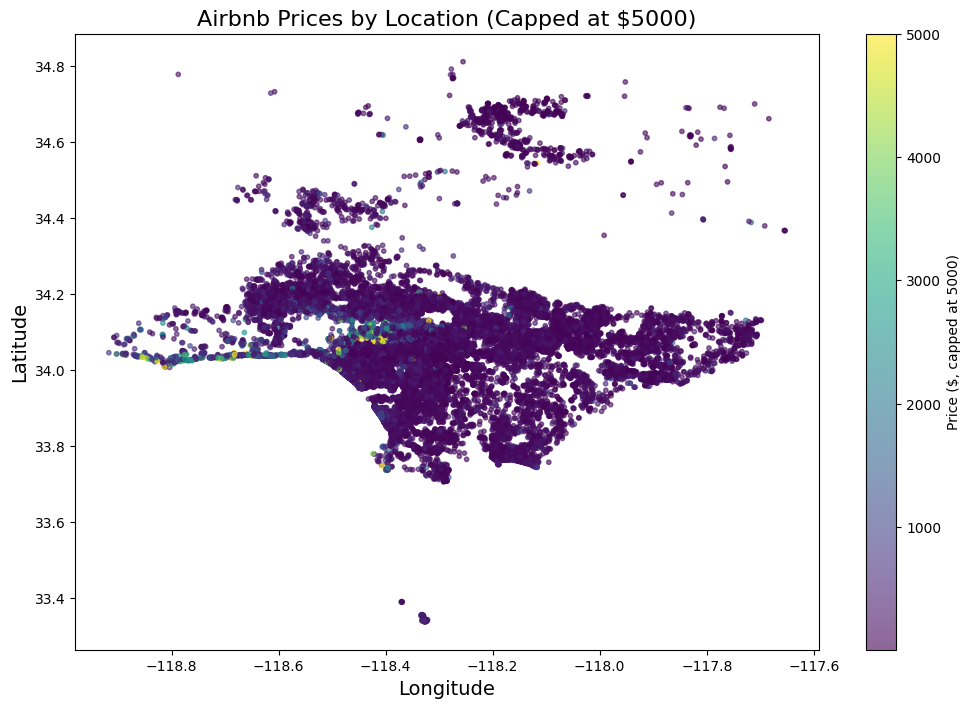

In [ ]:
#max price threshold for outliers
price_threshold = 5000
df['adjusted_price'] = df['price'].clip(upper=price_threshold)

#plot data
plt.figure(figsize=(12, 8))
plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['adjusted_price'],
    cmap='viridis',
    alpha=0.6,
    s=10
)
plt.colorbar(label='Price ($, capped at 5000)')
plt.title('Airbnb Prices by Location (Capped at $5000)', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.show()



In [ ]:
#most expensive neighborhoods observed by lat and long analysis above
filtered_neighborhoods = df[
    (df['longitude'] >= df['longitude'].min()) & (df['longitude'] <= -118.4) &
    (df['latitude'] >= 34.0) & (df['latitude'] <= 34.1)
]

neighborhood_counts = filtered_neighborhoods['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'count']

print(neighborhood_counts.head(10))

       neighbourhood  count
0       Santa Monica   1460
1             Malibu    469
2           Sawtelle    419
3           Westwood    402
4          Mar Vista    258
5      Beverly Hills    233
6          Brentwood    230
7            Topanga    228
8              Palms    216
9  Pacific Palisades    185


# Main Part


## Term Frequency Vectorization


In [ ]:
bag = {}

text = df['name']
text = " ".join(df['name'].astype(str))
text = re.sub('[^0-9a-zA-Z]+', ' ', text)
text = text.lower()

words = nltk.word_tokenize(text)
stop_words = set(stopwords.words('english'))


for word in words:
  if word in stop_words:
    continue
  elif word not in bag:
    bag[word] = 1
    continue
  bag[word] += 1

sorted_dict = {k: v for k, v in sorted(bag.items(), key=lambda item: item[1], reverse=True)}
print(sorted_dict)
# Get Top 100 Words in list

{'private': 6322, 'home': 5196, 'bedroom': 4513, 'room': 4462, 'beach': 4222, 'house': 3753, '2': 3747, 'hollywood': 3632, 'cozy': 3429, 'studio': 3387, 'w': 3322, 'la': 3247, 'pool': 3149, '1': 3018, 'near': 2984, 'modern': 2965, 'parking': 2243, 'hills': 1995, 'bath': 1915, 'bed': 1869, 'apartment': 1854, 'luxury': 1853, 'suite': 1752, 'spacious': 1745, '3': 1586, 'view': 1566, 'beautiful': 1439, 'views': 1415, 'new': 1367, 'dtla': 1333, 'venice': 1299, 'city': 1295, 'guest': 1234, 'apt': 1232, 'retreat': 1228, 'charming': 1181, 'oasis': 1175, 'heart': 1137, 'location': 1129, 'los': 1097, 'downtown': 1083, 'condo': 1063, 'lax': 1003, 'beverly': 975, 'bungalow': 954, 'west': 936, 'unit': 934, 'angeles': 881, 'ocean': 877, 'santa': 874, 'quiet': 872, '4': 867, 'villa': 864, 'free': 862, 'walk': 853, 'bathroom': 850, '5': 841, 'loft': 832, 'monica': 822, 'close': 778, 'lovely': 774, 'park': 766, 'gym': 761, 'king': 729, 'bright': 715, 'stylish': 706, 'large': 678, 'guesthouse': 666, 'on

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from collections import Counter

word_list = [word for word, _ in Counter(bag).most_common(100)]

feature_matrix = []

for name in df['name']:
    text = re.sub('[^0-9a-zA-Z]+', ' ', str(name)).lower()
    words = nltk.word_tokenize(text)
    feature_vector = [words.count(word) for word in word_list]
    feature_matrix.append(feature_vector)

feature_matrix = pd.DataFrame(feature_matrix, columns=word_list)
print(f"Feature matrix shape: {feature_matrix.shape}")




Feature matrix shape: (45533, 100)


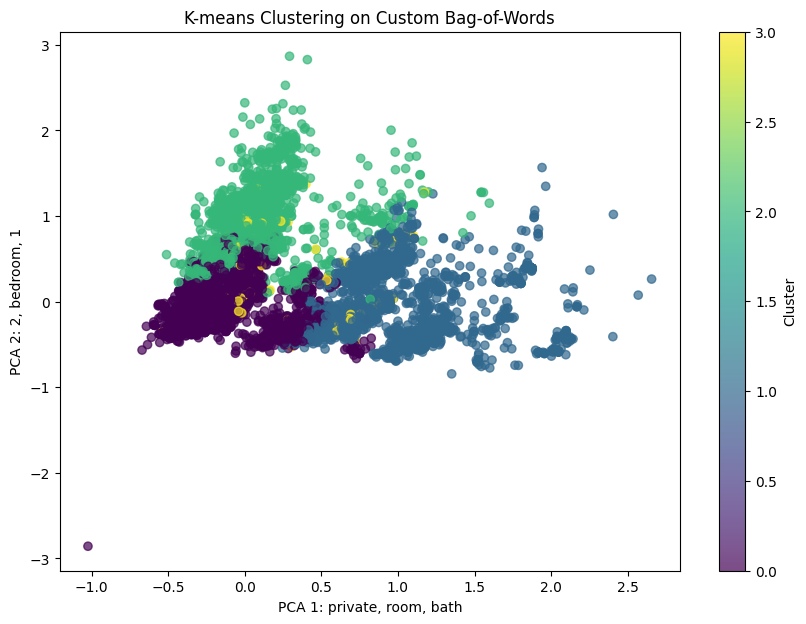

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(feature_matrix)

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_matrix)


pca_loadings = pd.DataFrame(pca.components_, columns=feature_matrix.columns)
top_features_pc1 = pca_loadings.iloc[0].sort_values(ascending=False).head(3)
top_features_pc2 = pca_loadings.iloc[1].sort_values(ascending=False).head(3)


plt.figure(figsize=(10, 7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("K-means Clustering on Custom Bag-of-Words")
plt.xlabel(f"PCA 1: {', '.join(top_features_pc1.index)}")
plt.ylabel(f"PCA 2: {', '.join(top_features_pc2.index)}")
plt.colorbar(label="Cluster")
plt.show()


# Supervised Learning - XGBoost Model

In this analysis, the Airbnb dataset is processed by removing unused columns, handling missing values, and encoding categorical features. The data is then split into training and test sets and an XGBoost regression model is trained to predict listing prices based on features like location, room type, and availability. We were able to determine that location was most important to the model for predicting price. It was difficult to understand the consistency of the model from the first scatterplot with the line of best fit, so we used a price bin analysis to better understand how well the XGBoost model worked. The price bin analysis compares average, actual, and predicted prices across different price ranges. The model starts off relatively accurate for the lower price bins but at very high price ranges, the predicted prices fluctuate and then significantly drop, unlike the actual prices, which continue to increase. This indicates that the model is less reliable for predicting extremely high prices and more reliable for predicting lower prices.

In [ ]:
import pandas as pd

file_path = 'listings.csv'
data = pd.read_csv("/content/listings.csv")

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,37014494,Spanish style lower duplex near Beverly Hills,278288178,Ida,City of Los Angeles,Beverlywood,34.048410,-118.387510,Entire home/apt,NaN,30,0,NaN,NaN,1,0,0,NaN
1,1024835174766068422,Charming Beverly Hills Home,513813179,Tiana,Other Cities,Beverly Hills,34.070583,-118.390742,Entire home/apt,434.0,30,0,NaN,NaN,4,267,0,NaN
2,1211025880050828732,Modern Hollywood Hills house,68445028,John,Other Cities,Beverly Hills,34.065140,-118.375820,Entire home/apt,319.0,1,0,NaN,NaN,25,365,0,NaN
3,953950676345326970,"Santa Monica apt, free parking, steps to the b...",528669205,Farkhat,Other Cities,Santa Monica,34.015590,-118.494080,Entire home/apt,231.0,5,44,2024-07-21,3.41,3,193,38,Exempt
4,5694422,2 Bedroom Modern Oasis,4151836,Sara,City of Los Angeles,Del Rey,33.990170,-118.422520,Entire home/apt,110.0,30,368,2023-05-04,3.21,2,117,0,HSR19-004352


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

irrelevant_columns = ['id', 'name', 'host_id', 'host_name', 'last_review', 'license']
data_cleaned = data.drop(columns=irrelevant_columns)

data_cleaned = data_cleaned.dropna(subset=['price'])

X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


800.3862663570818

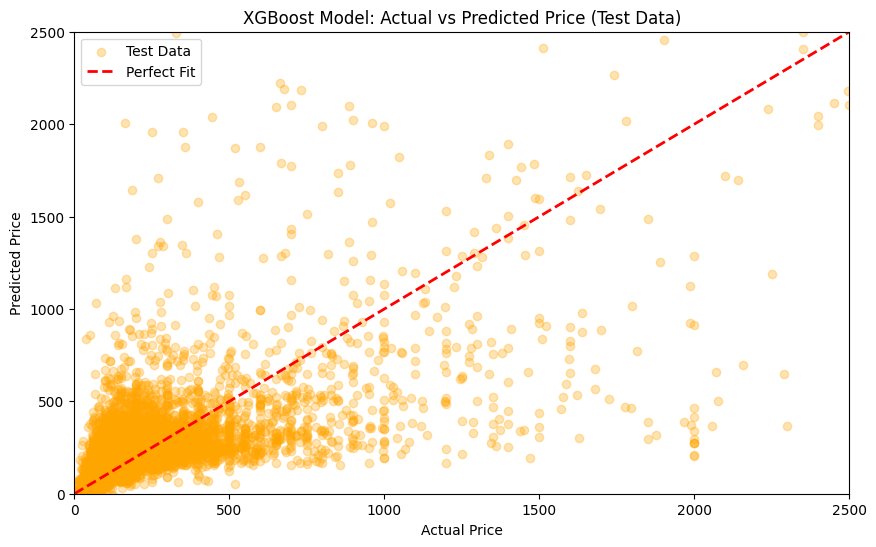

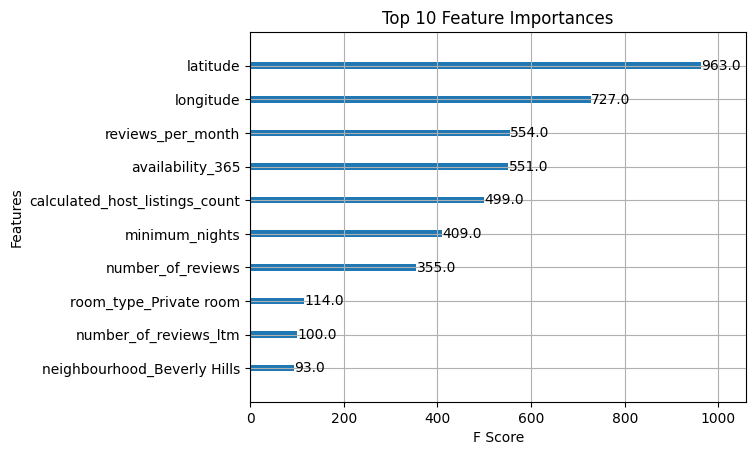

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Test Data', color='orange')
plt.plot([0, 2500], [0, 2500], color='red', linestyle='dashed', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Model: Actual vs Predicted Price (Test Data)')
plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.legend()
plt.show()

xgb.plot_importance(xgb_regressor, importance_type='weight', max_num_features=10, title='Top 10 Feature Importances', xlabel='F Score', ylabel='Features')
plt.show()


In [ ]:
import numpy as np
import pandas as pd

bins = np.arange(0, max(y_test.max(), y_pred.max()) + 100, 100)
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

test_results['Bin'] = pd.cut(y_test, bins=bins, labels=bin_labels, include_lowest=True)
bin_summary = test_results.groupby('Bin').mean()
bin_summary.reset_index(inplace=True)
bin_summary.rename(columns={'Actual': 'Average Actual Price', 'Predicted': 'Average Predicted Price'}, inplace=True)

print(bin_summary)


             Bin  Average Actual Price  Average Predicted Price
0          0-100             68.891368               129.758118
1        100-200            149.079838               231.677612
2        200-300            245.979079               289.826935
3        300-400            348.909639               330.827606
4        400-500            451.188679               383.605957
..           ...                   ...                      ...
560  56000-56100                   NaN                      NaN
561  56100-56200                   NaN                      NaN
562  56200-56300                   NaN                      NaN
563  56300-56400                   NaN                      NaN
564  56400-56500          56425.000000               371.654968

[565 rows x 3 columns]


<ipython-input-18-b516b35748ee>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = test_results.groupby('Bin').mean()


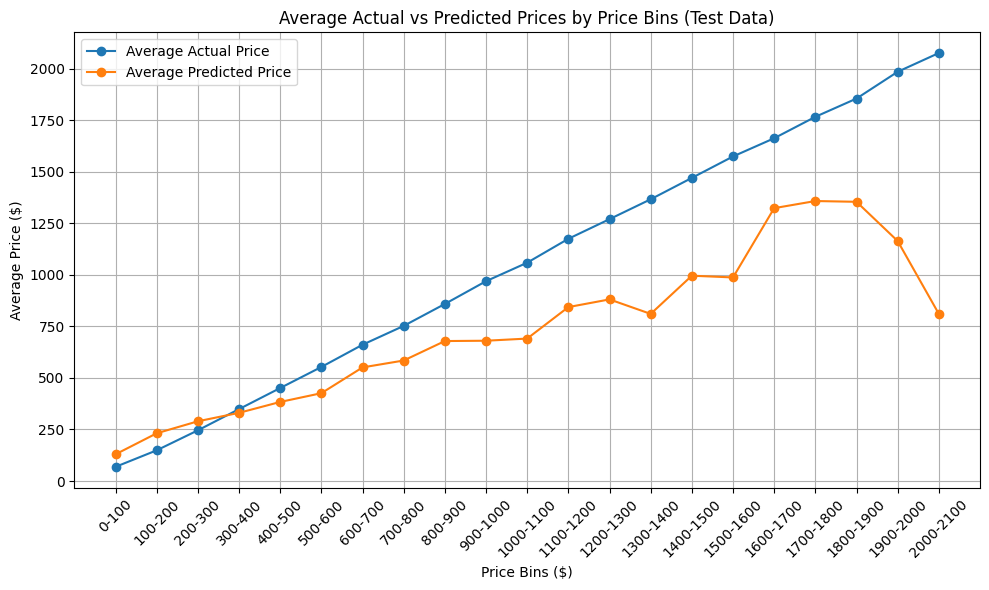

In [ ]:
bin_summary_filtered = bin_summary[bin_summary['Bin'].str.split('-').str[0].astype(int) <= 2000]

plt.figure(figsize=(10, 6))
plt.plot(bin_summary_filtered['Bin'], bin_summary_filtered['Average Actual Price'], label='Average Actual Price', marker='o')
plt.plot(bin_summary_filtered['Bin'], bin_summary_filtered['Average Predicted Price'], label='Average Predicted Price', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Price Bins ($)')
plt.ylabel('Average Price ($)')
plt.title('Average Actual vs Predicted Prices by Price Bins (Test Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()